# Signal Processing

This notebook works from mseed files; creates wav-format subsets; displays signals and spectrograms; and so on. It is in the sub-folder 'rob' so that Rob can work on stuff here without breaking other parts of the repo.

In [12]:
!pip install pydub
!pip install obspy
!pip install wave
!pip install scipy
!pip install plotly

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
from obspy import read
import wave
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True) # to render plotly 3-d spectogram in the notebook

import IPython.display as ipd  # To play sound in the notebook
import os
import wave

In [14]:
#for chunking audio files
from pydub import AudioSegment
from pydub.utils import make_chunks

%matplotlib inline

In [15]:
timestamp = '2017-10-06T20:30:00'
informal_timestamp = '5min_2017_10_06_20_30'
samplefnm = 'sample_' + informal_timestamp + '.wav'

In [28]:
# Lets read a mseed url
# This step might take some time reading data from the URL depending on internet speed.
# 20:30 on October 6 2017 is a sperm whale; for example at 20:34:20 and 20:35:50
# Also notice that the data_url needs to have the right magical set of digits after the 
#   decimal point as in 00.000016.

base_url = 'https://rawdata.oceanobservatories.org/files/'
instrument_qualifier = 'RS01SLBS/LJ01A/09-HYDBBA102/'
datetime_qualifier = '2017/10/06/OO-HYVM1--YDH-' + timestamp + '.000016.'
filetype_qualifier = 'mseed'
data_url = base_url + instrument_qualifier + datetime_qualifier + filetype_qualifier
stream = read(data_url)
print(stream)
print(data_url)

1 Trace(s) in Stream:
OO.HYVM1..YDH | 2017-10-06T20:30:00.000016Z - 2017-10-06T20:34:59.998000Z | 64000.0 Hz, 19199872 samples
https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:30:00.000016.mseed


OO.HYVM1..YDH | 2017-10-06T20:30:00.000016Z - 2017-10-06T20:34:59.998000Z | 64000.0 Hz, 19199872 samples
         network: OO
         station: HYVM1
        location: 
         channel: YDH
       starttime: 2017-10-06T20:30:00.000016Z
         endtime: 2017-10-06T20:34:59.998000Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199872
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6397, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 26202112})


Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is n

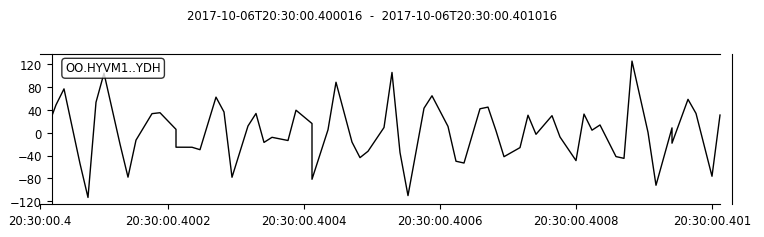

Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is not well supported. Please see the MicrosecondLocator documentation for details.
Plotting microsecond time intervals is n

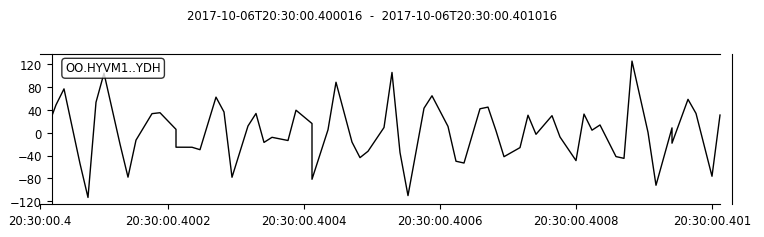

In [29]:
#lets remove some lower frequency
sample = stream[0]
print(sample)
print(sample.stats)
# sample.plot()
sample.filter('highpass', freq=15000.0)
sample.plot(starttime=sample.stats.starttime + 0.4, endtime = sample.stats.starttime + 0.401)

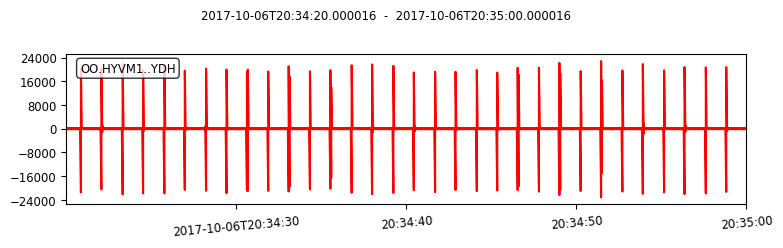

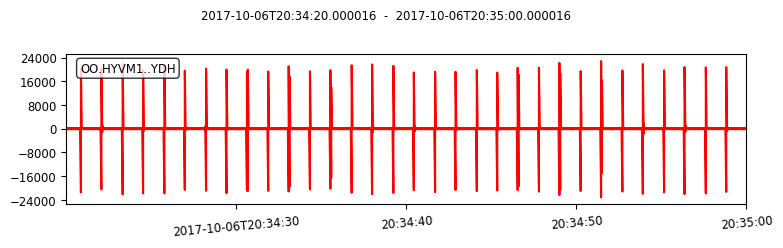

In [34]:
sample = stream[0]
dt = sample.stats.starttime
jump_sec = 52*5
sample.plot(color='red', number_of_ticks=7, 
                   tick_rotation=5, tick_format='%I:%M %p',
                   starttime=dt + jump_sec, endtime=dt + jump_sec + 40)  # .86 to .88 is an ADCP spike

In [ ]:
# Normalize the signal: operates in place
# Without doing this Shiv says the results are inaudible
sample.normalize()
# sample.plot()
    
# convert our samples to integer values
sample.data = (sample.data * (2**31-1)).astype('int32')
for i in sample.data:
    print (i)
# save as a .wav file; making sure framerate agrees with obspy's evaluation of the dataset
sample.write(samplefnm, format='WAV', framerate=64000)

In [20]:
# Using wave library
wav = wave.open(samplefnm)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  64000
Total samples (frames) =  19199872
Duration =  299.998


In [21]:
doThis = False

if doThis:
    sample_audio = AudioSegment.from_file(samplefnm , "wav") 

    # this length is in milliseconds; so 5000 is 5 seconds
    chunk_length = 5000
    chunks = make_chunks(sample_audio, chunk_length)

    #Export chunks as wav files and save locally 
    # To use a sub-folder called 'audio_sample' first un-comment this code and then
    #   modify the chunk_name variable in the following.
    # try:
    #     os.makedirs('audio_sample')
    # except OSError:
    #     print('Folder already there')
    #     pass


    for i, chunk in enumerate(chunks):
        chunk_name = "chunk{0}.wav".format(i)
        print ("exporting", chunk_name)
        chunk.export(chunk_name, format="wav")

In [22]:
#Lets listen to one chunkedd audio
oneminutefnm = 'chunk52.wav'
ipd.Audio(oneminutefnm)

### Remark on window length and resolution 


Let us extract essential information from sound files to generate a spectogram.
We use Scipy spectrogram function to get the essential information.


There is some fine-tuning of window size to balance temporal resolution and frequency resolution.
The wider the window size in time the lower the temporal resolution; but this makes more frequencies
available so frequency resolution is higher. 
See for example this 
[signal processing reference](https://en.wikipedia.org/wiki/Uncertainty_principle#Signal_processing).

In [ ]:
# notice default parameters window_size = 10, step_size = 1, eps = 1e-10
#   If we modify the window to be 20... it blurs in the time axis, sharpens frequency
#   If ... 5 ... the reverse is the case

def spectogram_data(audio, sample_rate, window_size=10, step_size=1, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    print(nperseg, noverlap)
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
datafnm = 'chunk52.wav'

sample_rate, samples = wavfile.read(datafnm)
frequency_val, time_val, spectrogram = spectogram_data(samples, sample_rate) # default window = 10

fig = plt.figure(figsize=(16, 16))
ax2 = fig.add_subplot(211)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', extent=[time_val.min(), time_val.max(), frequency_val.min(), frequency_val.max()])
ax2.set_yticks(frequency_val[::100])
ax2.set_xticks(time_val[::100])
ax2.set_title('Spectrogram')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')
ipd.Audio(oneminutefnm)

In [ ]:
datafnm = 'chunk52.wav'

sample_rate, samples = wavfile.read(datafnm)
frequency_val, time_val, spectrogram = spectogram_data(samples, sample_rate, 5)

fig = plt.figure(figsize=(16, 16))
ax2 = fig.add_subplot(211)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', extent=[time_val.min(), time_val.max(), frequency_val.min(), frequency_val.max()])
ax2.set_yticks(frequency_val[::100])
ax2.set_xticks(time_val[::100])
ax2.set_title('Spectrogram')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')
ipd.Audio(oneminutefnm)

In [ ]:
datafnm = 'chunk52.wav'

sample_rate, samples = wavfile.read(datafnm)
frequency_val, time_val, spectrogram = spectogram_data(samples, sample_rate, 5)

fig = plt.figure(figsize=(16, 16))
ax2 = fig.add_subplot(211)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', extent=[time_val.min(), time_val.max(), frequency_val.min(), frequency_val.max()])
ax2.set_yticks(frequency_val[::100])
ax2.set_xticks(time_val[::100])
ax2.set_title('Spectrogram')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')
ipd.Audio(oneminutefnm)

# Lets see how a spectogram looks in 3D

In [1]:
# use plotly to render a 3d representation of spectogram.
data = [go.Surface(z=spectrogram.T)]
layout = go.Layout(
    title='Specgtrogram in 3d',
    scene = dict(
    yaxis = dict(title='Frequencies'),
    xaxis = dict(title='Time'),
    zaxis = dict(title='Log amplitude'),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

NameError: name 'go' is not defined